# Task - Prediction using Decision Tree  Algorithm 

# Author - Kajol Buktare

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
df = pd.read_csv('C:\Python\Python36\Lib\site-packages\pandas\io\IRIS.csv')
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

# Plotting data for visualization

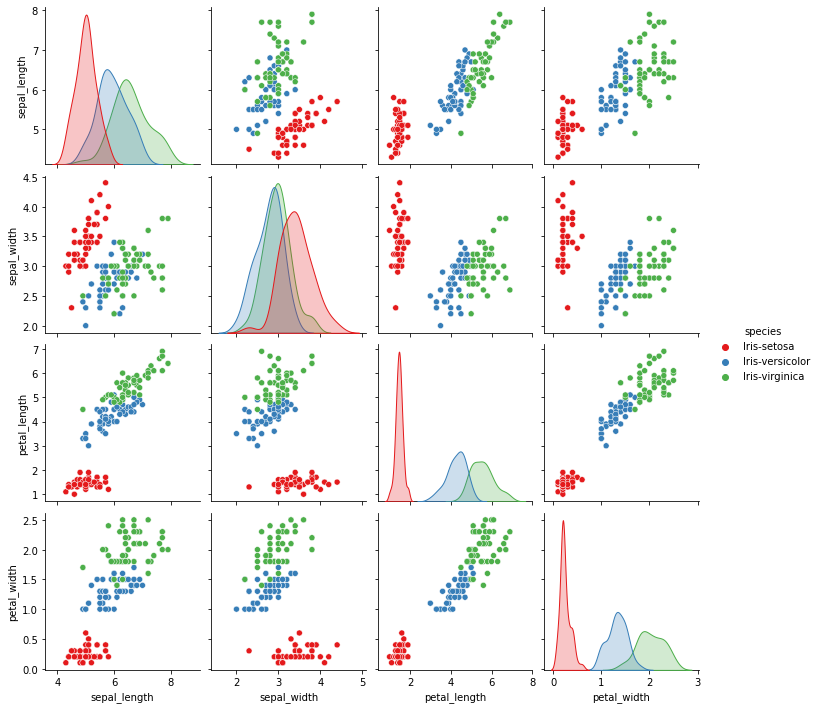

In [7]:
sns.pairplot(df,hue='species',palette='Set1')

<AxesSubplot:>

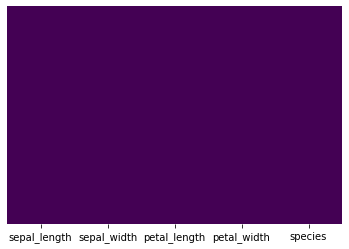

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#dataset doesn't have null values

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

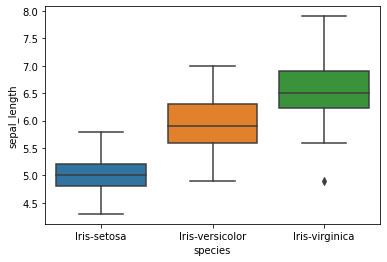

In [9]:
sns.boxplot(x='species',y='sepal_length',data=df)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

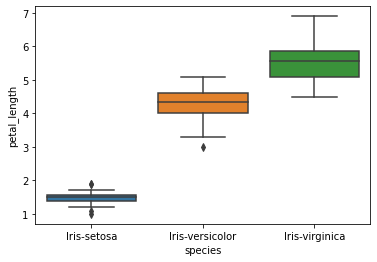

In [10]:
sns.boxplot(x='species',y='petal_length',data=df)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

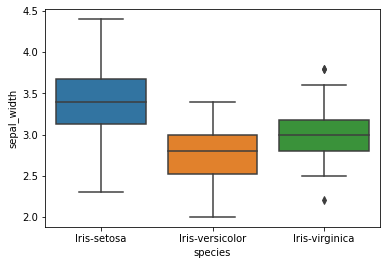

In [11]:
sns.boxplot(x='species',y='sepal_width',data=df)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

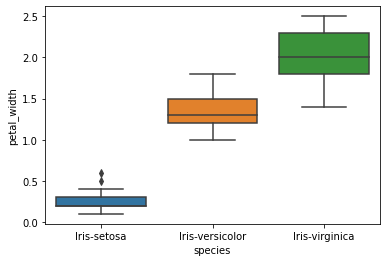

In [12]:
sns.boxplot(x='species',y='petal_width',data=df)

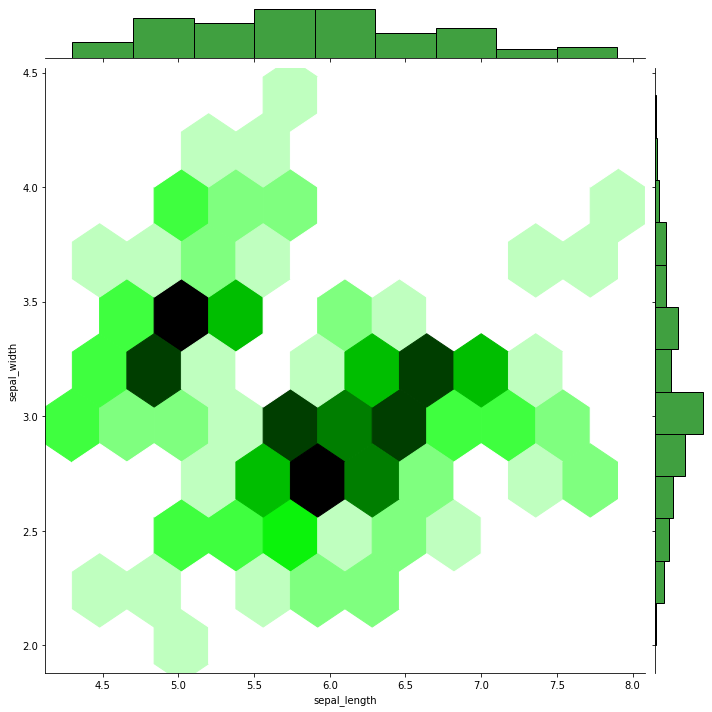

In [13]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df,height=10,ratio=10,kind='hex',color='green')
#darker color=high concentration,lighter color=low concentration

# Exploratary data analysis- histograms

<AxesSubplot:>

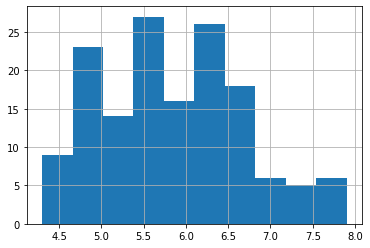

In [20]:
df['sepal_length'].hist()

<AxesSubplot:>

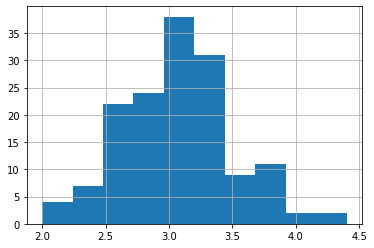

In [22]:
df['sepal_width'].hist()

<AxesSubplot:>

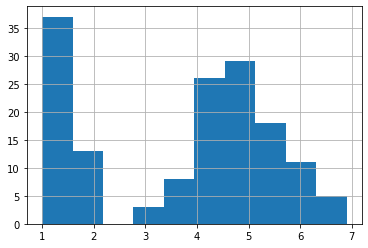

In [21]:
df['petal_length'].hist()

<AxesSubplot:>

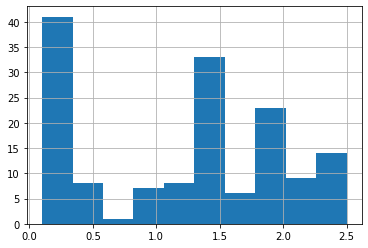

In [23]:
df['petal_width'].hist()

# Shuffle the dataset

In [14]:
df=df.sample(frac=1)

In [15]:
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
62,6.0,2.2,4.0,1.0,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa
128,6.4,2.8,5.6,2.1,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encode=LabelEncoder()

In [17]:
df["Encoded species"]=label_encode.fit_transform(df['species'])

In [18]:
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species,Encoded species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
62,6.0,2.2,4.0,1.0,Iris-versicolor,1
21,5.1,3.7,1.5,0.4,Iris-setosa,0
74,6.4,2.9,4.3,1.3,Iris-versicolor,1
104,6.5,3.0,5.8,2.2,Iris-virginica,2
18,5.7,3.8,1.7,0.3,Iris-setosa,0
128,6.4,2.8,5.6,2.1,Iris-virginica,2
127,6.1,3.0,4.9,1.8,Iris-virginica,2
1,4.9,3.0,1.4,0.2,Iris-setosa,0
50,7.0,3.2,4.7,1.4,Iris-versicolor,1


# Iris-setosa-0,Iris-versicolor-1,Iris-virginica-2

In [19]:
enc_df=label_encode.fit_transform(df['species'])
enc_df

array([0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1,
       0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2])

# Splitting data to test and train it

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.values[:,0:4]
y=df.values[:,4]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

# Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
predictions=model.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.86      0.86      0.86        14
 Iris-virginica       0.87      0.87      0.87        15

       accuracy                           0.91        45
      macro avg       0.91      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45



In [32]:
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 12  2]
 [ 0  2 13]]


# Decision Tree given by GraphViz

In [33]:
features=df.columns[:4]

In [34]:
features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [35]:
target=list(df.species.unique())
target

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

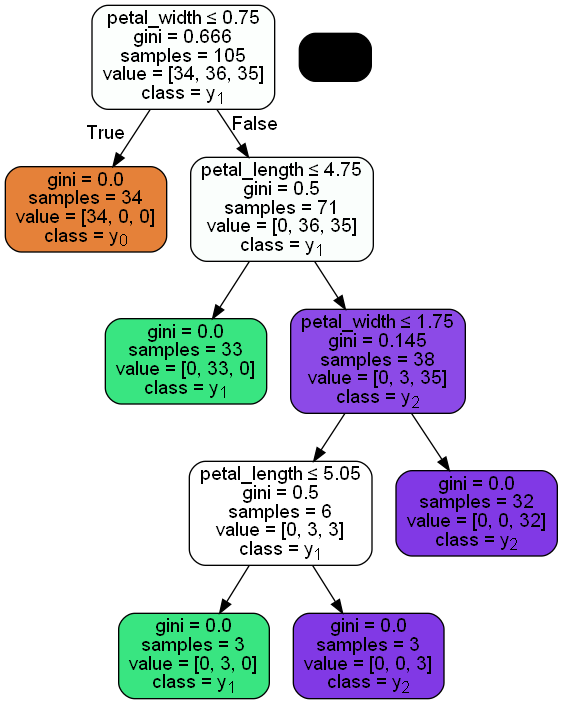

In [36]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,feature_names=features,
                filled=True,rounded=True,special_characters=True,
                class_names=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Decision Tree using tree in sklearn

In [37]:
from sklearn import tree

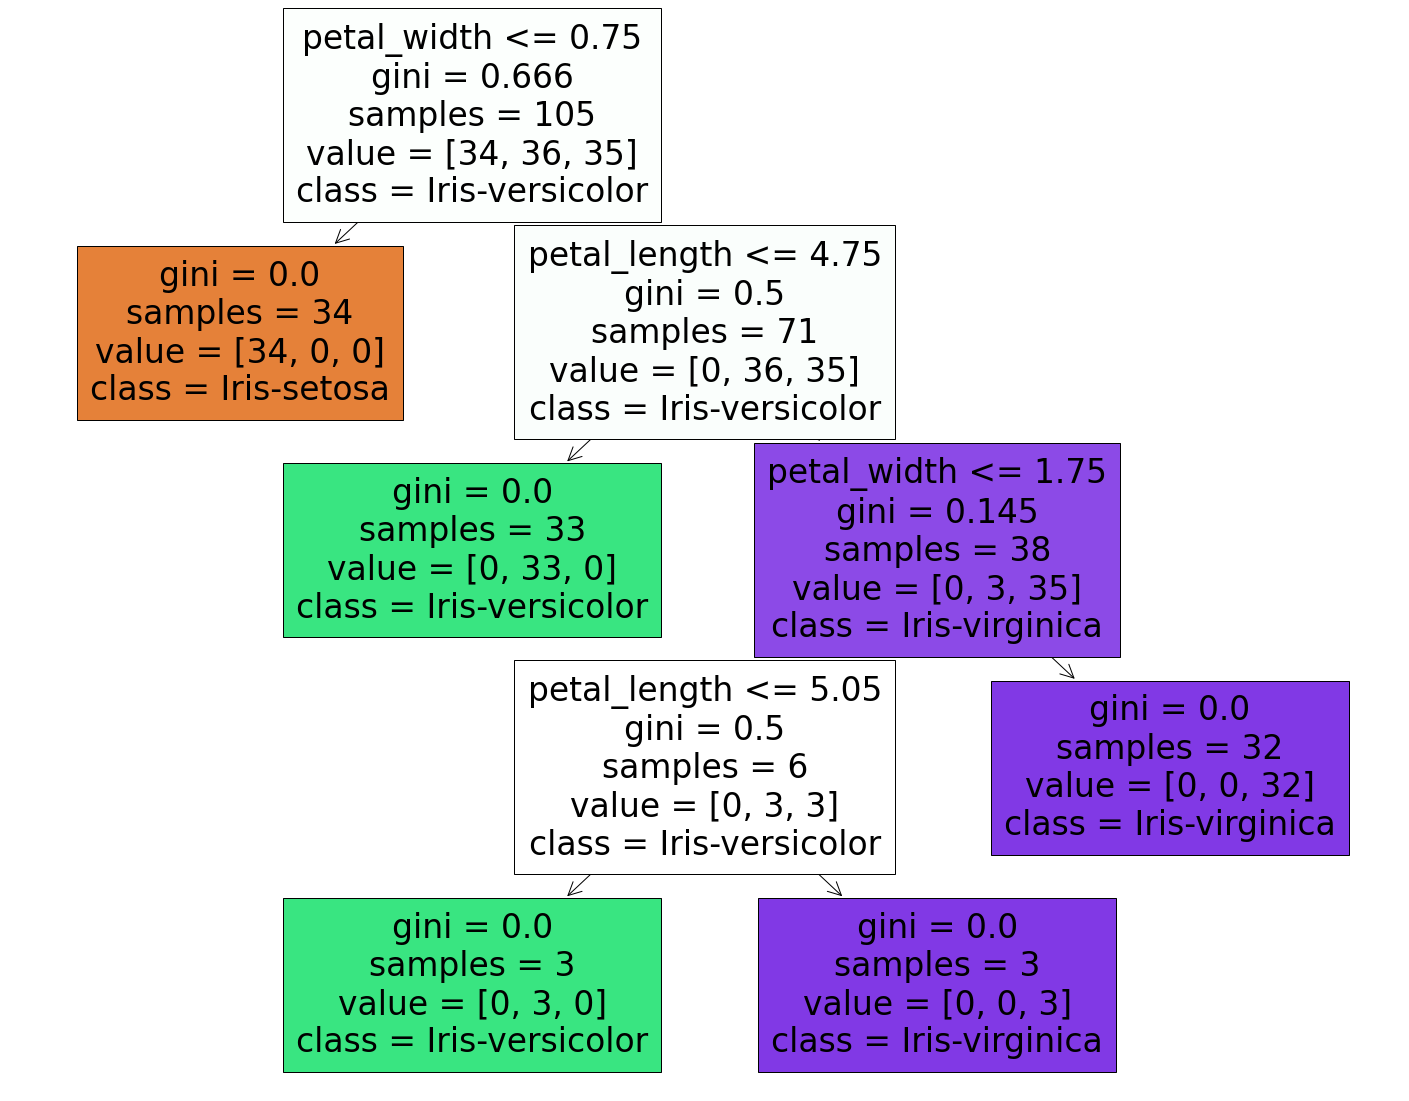

In [38]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(model,feature_names=features,filled=True,class_names=target)